In [38]:
SEED = 99
TEST_SIZE = 0.2

## Getting the dataset:
##### https://archive.ics.uci.edu/dataset/342/mice+protein+expression

In [1]:
from ucimlrepo import fetch_ucirepo 

# faz o fetch do dataset 
dataset = fetch_ucirepo(id=342)

# dados (pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C


### Understanting the dataset

In [2]:
dtypes = []
for coluna, dtype in X.dtypes.items():
    dtypes.append(dtype)

print(set(dtypes))

{dtype('float64'), dtype('O')}


In [3]:
for coluna, dtype in X.dtypes.items():
    if dtype != "float64":
        print(f'{coluna}: {dtype}')
        print(X[coluna].unique())


Genotype: object
['Control' 'Ts65Dn']
Treatment: object
['Memantine' 'Saline']
Behavior: object
['C/S' 'S/C']


In [4]:
y

,class
0,c-CS-m
1,c-CS-m
2,c-CS-m
3,c-CS-m
4,c-CS-m
...,...
1075,t-SC-s
1076,t-SC-s
1077,t-SC-s
1078,t-SC-s


In [5]:
y['class'].unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [6]:
X.isna().sum()


DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
H3MeK4_N     270
CaNA_N         0
Genotype       0
Treatment      0
Behavior       0
Length: 80, dtype: int64

In [7]:
X.isna().any()

DYRK1A_N      True
ITSN1_N       True
BDNF_N        True
NR1_N         True
NR2A_N        True
             ...  
H3MeK4_N      True
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
Length: 80, dtype: bool

## Preprocessing

##### Applying one hot encoding for the categorical values present in the features of dataset

In [8]:
import pandas as pd
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    # using 0 and 1 as the categories of theses features are only two
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=False, dtype=int)


#### Dealing with null values

In [11]:
# filling null or nan values with the median of the column
numeric_cols = X.select_dtypes(include='number')
for colunm in numeric_cols:
    if X[colunm].isna().any():
        median = X[colunm].median()
        X[colunm] = X[colunm].fillna(median)

print("checking if there is any null values in the data:", X.isnull().any().unique())

checking if there is any null values in the data: [False]


#### Scaling data

In [14]:
from sklearn.preprocessing import StandardScaler

for atributo in X.columns:
    if X[atributo].dtype != 'object':
        # print(atributo)
        X[atributo] = StandardScaler().fit_transform(X[[atributo]])
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C
0,0.313350,0.518471,2.253803,1.497368,2.304588,-0.344885,-0.158648,-0.899416,0.604281,0.691885,...,-0.973682,-1.367167,-1.540161,1.065901,0.945905,-0.945905,0.945905,-0.945905,1.028175,-1.028175
1,0.357433,0.287052,1.880415,1.420015,1.976995,-0.517992,-0.334569,-0.962530,0.442825,0.360253,...,-1.025367,-1.276125,-1.479437,1.280291,0.945905,-0.945905,0.945905,-0.945905,1.028175,-1.028175
2,0.335603,0.451006,2.013063,1.124866,1.909375,-0.581163,-0.226938,-0.969347,0.543502,0.285024,...,-1.027034,-1.323973,-1.555782,1.857038,0.945905,-0.945905,0.945905,-0.945905,1.028175,-1.028175
3,0.066132,0.000465,0.802262,0.489487,1.219480,-0.247290,-0.199508,-1.070704,-0.171066,0.357483,...,-0.686310,-0.936981,-1.152691,1.144490,0.945905,-0.945905,0.945905,-0.945905,1.028175,-1.028175
4,0.037342,0.001873,0.805831,0.197657,0.939439,-0.482624,-0.304563,-1.084849,-0.627499,0.162535,...,-0.905652,-1.132915,-1.122074,1.583530,0.945905,-0.945905,0.945905,-0.945905,1.028175,-1.028175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.686104,-0.610570,-1.302875,-0.591910,-1.335295,-0.515599,-0.392183,-0.814334,-0.161447,-0.794991,...,2.778917,0.635355,2.603399,0.085303,-1.057188,1.057188,-1.057188,1.057188,-0.972598,0.972598
1076,-0.616453,-0.568484,-1.368257,-0.391973,-1.118996,0.435808,0.024031,-0.791905,0.115927,-0.745256,...,2.905065,0.518682,1.881022,0.084215,-1.057188,1.057188,-1.057188,1.057188,-0.972598,0.972598
1077,-0.791202,-0.882924,-1.723681,-1.627245,-1.742414,-0.300726,-0.756252,-1.196458,-0.842506,-1.167541,...,2.825345,1.309532,3.160031,0.293525,-1.057188,1.057188,-1.057188,1.057188,-0.972598,0.972598
1078,-0.821160,-0.812399,-1.523728,-1.214253,-1.567152,-0.583911,-0.304696,-1.121966,-0.631004,-1.085464,...,3.094478,1.917497,3.369964,0.208996,-1.057188,1.057188,-1.057188,1.057188,-0.972598,0.972598


#### Dimensionality reduction

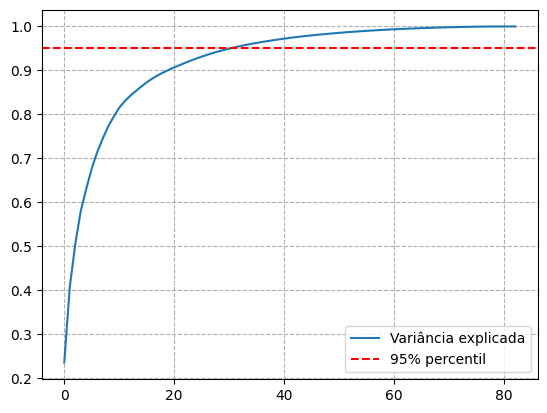

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variância explicada')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentil')
plt.grid(True, linestyle='--')
plt.legend()

In [16]:
pca   = PCA(n_components=30)
X_pca = pca.fit_transform(X)

X_pca

array([[ 4.56205357,  5.57143386, -1.49804752, ...,  0.63682012,
         0.62474908,  0.56405592],
       [ 2.94858613,  5.57938135, -0.58099305, ...,  0.57742209,
         0.54426413,  0.38968011],
       [ 3.06214522,  5.77770268, -0.35283328, ...,  0.68608848,
         0.45378717,  0.43805672],
       ...,
       [-7.36427463, -2.98015653,  1.9976194 , ..., -0.50331369,
        -0.16238885,  0.38762584],
       [-6.27163251, -3.48270697,  2.01304613, ..., -0.82397645,
         0.51836994,  0.96695228],
       [-2.91281565, -3.99895765,  0.13622554, ..., -0.72553752,
        -0.0733176 ,  0.5977449 ]], shape=(1080, 30))

#### Splitting dataset for train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=TEST_SIZE, random_state=SEED)
print(X_train.shape)
print(y_train.shape)

(864, 30)
(864, 1)


#### Numeric encoding for the dataset labels

In [ ]:
unique_classes = sorted(y['class'].unique())
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
y_train = y_train.replace(class_mapping)
y_test = y_test.replace(class_mapping)
print('class mapping: ', class_mapping)

class mapping:  {'c-CS-m': 0, 'c-CS-s': 1, 'c-SC-m': 2, 'c-SC-s': 3, 't-CS-m': 4, 't-CS-s': 5, 't-SC-m': 6, 't-SC-s': 7}


## Hyperparameter search

#### Defining models and initializing ray instance

In [ ]:
import ray
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint, loguniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

ray.shutdown()
ray.init(ignore_reinit_error=True, include_dashboard=False)

models_to_tune = ['KNN', 'SVM', 'DT', 'RF', 'LR', 'MLP']
X_train_ref = ray.put(X_train)
y_train_ref = ray.put(y_train.to_numpy().ravel())

2025-09-21 22:43:28,096	INFO worker.py:1951 -- Started a local Ray instance.


(_halving_worker pid=68156) c:\Users\witor\miniforge3\envs\distribuidos\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 304 iteration(s) (status=1):
(_halving_worker pid=68156) STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT
(_halving_worker pid=68156) 
(_halving_worker pid=68156) Increase the number of iterations to improve the convergence (max_iter=304).
(_halving_worker pid=68156) You might also want to scale the data as shown in:
(_halving_worker pid=68156)     https://scikit-learn.org/stable/modules/preprocessing.html
(_halving_worker pid=68156)   self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
(_halving_worker pid=68156) c:\Users\witor\miniforge3\envs\distribuidos\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 304 iteration(s) (status=1):
(_halving_worker pid=68156) STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT
(_h

##### Hypermarameter search

###### The Halving Random Search from Scikit Learn lib is being used to do the hyperparamenter search
###### Here, the average accuracy of cross-validation step executed in each trainig is being used as the score to define which model is best

In [40]:
# defining hyperparamenters interval top do the search
halving_param_distributions = {
    'KNN': {
        'n_neighbors': randint(3, 75),
        'weights': ['uniform', 'distance'],
        'p': randint(1, 3),
    },
    'SVM': {
        'C': loguniform(1e-3, 1e3),
        'gamma': loguniform(1e-4, 1),
        'kernel': ['rbf', 'poly', 'sigmoid'],
        'degree': randint(2, 6),
    },
    'DT': {
        'max_depth': randint(2, 31),
        'min_samples_split': randint(2, 21),
        'min_samples_leaf': randint(1, 11),
        'criterion': ['gini', 'entropy', 'log_loss'],
    },
    'RF': {
        'n_estimators': randint(100, 401),
        'max_depth': randint(3, 41),
        'min_samples_split': randint(2, 21),
        'min_samples_leaf': randint(1, 11),
        'max_features': ['sqrt', 'log2', None],
    },
    'LR': {
        'C': loguniform(1e-3, 10.0),
        'max_iter': randint(200, 801),
        'solver': ['lbfgs', 'saga'],
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'lbfgs'],
        'alpha': loguniform(1e-5, 1e-1),
        'learning_rate_init': loguniform(1e-4, 1e-1),
        'max_iter': randint(200, 601)
    },
}

def build_halving_estimator(model):
    if model == 'KNN':
        return KNeighborsClassifier()
    if model == 'SVM':
        return SVC()
    if model == 'DT':
        return DecisionTreeClassifier(random_state=SEED)
    if model == 'RF':
        return RandomForestClassifier(random_state=SEED)
    if model == 'LR':
        return LogisticRegression(penalty='l2', random_state=SEED)
    if model == 'MLP':
        return MLPClassifier(random_state=SEED)

In [41]:
@ray.remote
def _halving_worker(model_name, seed=SEED):
    X_tr = ray.get(X_train_ref)
    y_tr = ray.get(y_train_ref)
    estimator = build_halving_estimator(model_name)
    search = HalvingRandomSearchCV(
        estimator=estimator,
        param_distributions=halving_param_distributions[model_name],
        factor=2,
        random_state=seed,
        scoring='accuracy',
        n_jobs=-1,
        cv=3
    )
    search.fit(X_tr, y_tr)
    return {
        'model': model_name,
        'best_params': search.best_params_,
        'best_score': search.best_score_,
    }

def run_halving_search(models=models_to_tune, seed=SEED):
    tasks = [_halving_worker.remote(model, seed) for model in models]
    return ray.get(tasks)

halving_results = run_halving_search()
for res in halving_results:
    print(f"{res['model']}: score={res['best_score']:.4f}, params={res['best_params']}")

KNN: score=0.9870, params={'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
SVM: score=0.9922, params={'C': np.float64(2.9265629756562412), 'degree': 3, 'gamma': np.float64(0.9172962073594374), 'kernel': 'poly'}
DT: score=0.8503, params={'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 3}
RF: score=0.9883, params={'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 223}
LR: score=1.0000, params={'C': np.float64(2.004382933025085), 'max_iter': 268, 'solver': 'saga'}
MLP: score=1.0000, params={'activation': 'tanh', 'alpha': np.float64(0.025472681954390886), 'hidden_layer_sizes': (100, 50), 'learning_rate_init': np.float64(0.020388209359959737), 'max_iter': 444, 'solver': 'lbfgs'}


#### Checking the main matrics after find the hyperparameter search

c:\Users\witor\miniforge3\envs\distribuidos\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


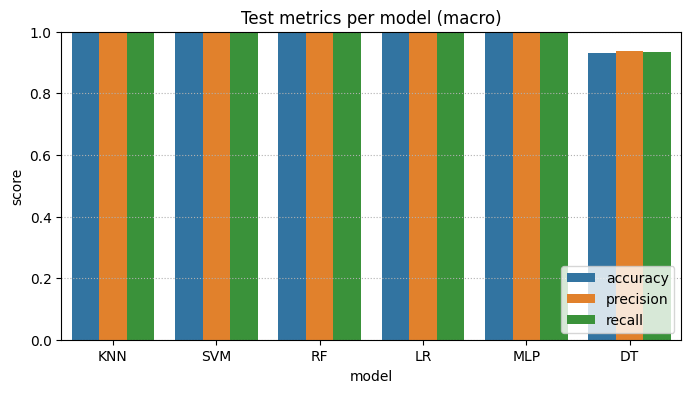

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def build_halving_estimator_opt(model: str, best_params: dict | None = None):
    """Create the estimator for the given model name using best_params.
    Supported: 'KNN', 'SVM', 'DT', 'RF', 'LR', 'MLP'.
    """
    if best_params is None:
        best_params = {}
    
    if model == 'KNN':
        return KNeighborsClassifier(**best_params)
    elif model == 'SVM':
        return SVC(**best_params)
    elif model == 'DT':
        return DecisionTreeClassifier(**best_params)
    elif model == 'RF':
        return RandomForestClassifier(**best_params)
    elif model == 'LR':
        return LogisticRegression(**best_params)
    elif model == 'MLP':
        return MLPClassifier(**best_params)
    else:
        print(f'Model {model} not supported')

# Collect best hyperparameters from the search already made
best_params_map = {}

for r in halving_results:
    best_params_map[r['model']] = r['best_params']

def to_1d(y):
    import numpy as _np
    if hasattr(y, 'values'):
        return _np.ravel(y.values)
    return _np.ravel(y)

best_models = {}
metrics_rows = []

# creating the models with the best parameters and training them
for model_name in models_to_tune:
    params = best_params_map.get(model_name, {})
    est = build_halving_estimator_opt(model_name, params)

    # training model with best parameters
    est.fit(X_train, y_train['class'])
    best_models[model_name] = est

    # prediction for the test dataset
    y_pred = est.predict(X_test)
    acc = accuracy_score(y_test['class'], y_pred)
    prec = precision_score(y_test['class'], y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test['class'], y_pred, average='macro', zero_division=0)
    metrics_rows.append({'model': model_name, 'accuracy': acc, 'precision': prec, 'recall': rec})

metrics_df = pd.DataFrame(metrics_rows).sort_values('accuracy', ascending=False)

# Plot grouped bars for accuracy/precision/recall
fig, ax = plt.subplots(figsize=(8, 4))
metrics_df_melt = metrics_df.melt(id_vars='model', value_vars=['accuracy','precision','recall'], var_name='metric', value_name='score')
sns.barplot(data=metrics_df_melt, x='model', y='score', hue='metric', ax=ax)
ax.set_ylim(0, 1.0)
ax.set_title('Test metrics per model (macro)')
ax.grid(True, axis='y', linestyle=':')
plt.legend(loc='lower right')
plt.show()


### Consfusion matrix

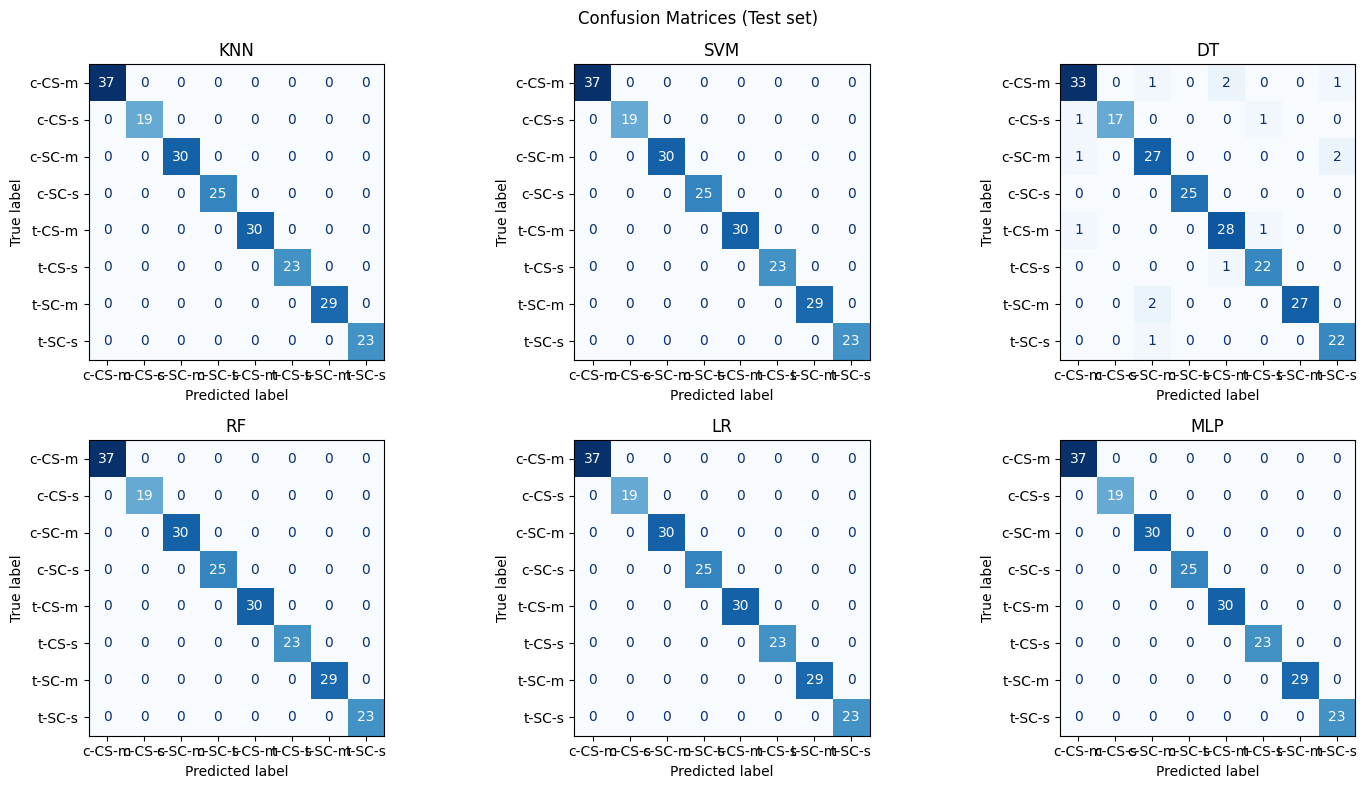

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare display labels if class_mapping is available
inv_map = {v: k for k, v in class_mapping.items()}
display_labels = [inv_map[i] for i in sorted(inv_map)]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for idx, (name, est) in enumerate(best_models.items()):
    if idx >= len(axes):
        break
    y_pred = est.predict(X_test)
    cm = confusion_matrix(y_test['class'], y_pred, labels=sorted(np.unique(y_test['class'])))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(ax=axes[idx], colorbar=False, cmap='Blues', values_format='d')
    axes[idx].set_title(name)

# # Hide any unused subplots
# for j in range(idx + 1, len(axes)):
#     axes[j].axis('off')

fig.suptitle('Confusion Matrices (Test set)')
plt.tight_layout()
plt.show()


### Decision boundary

C:\Users\witor\AppData\Local\Temp\ipykernel_16028\936322871.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_boundary = y_train_boundary.replace(class_mapping_2d)
C:\Users\witor\AppData\Local\Temp\ipykernel_16028\936322871.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_boundary = y_test_boundary.replace(class_mapping_2d)
c:\Users\witor\miniforge3\envs\distribuidos\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x')

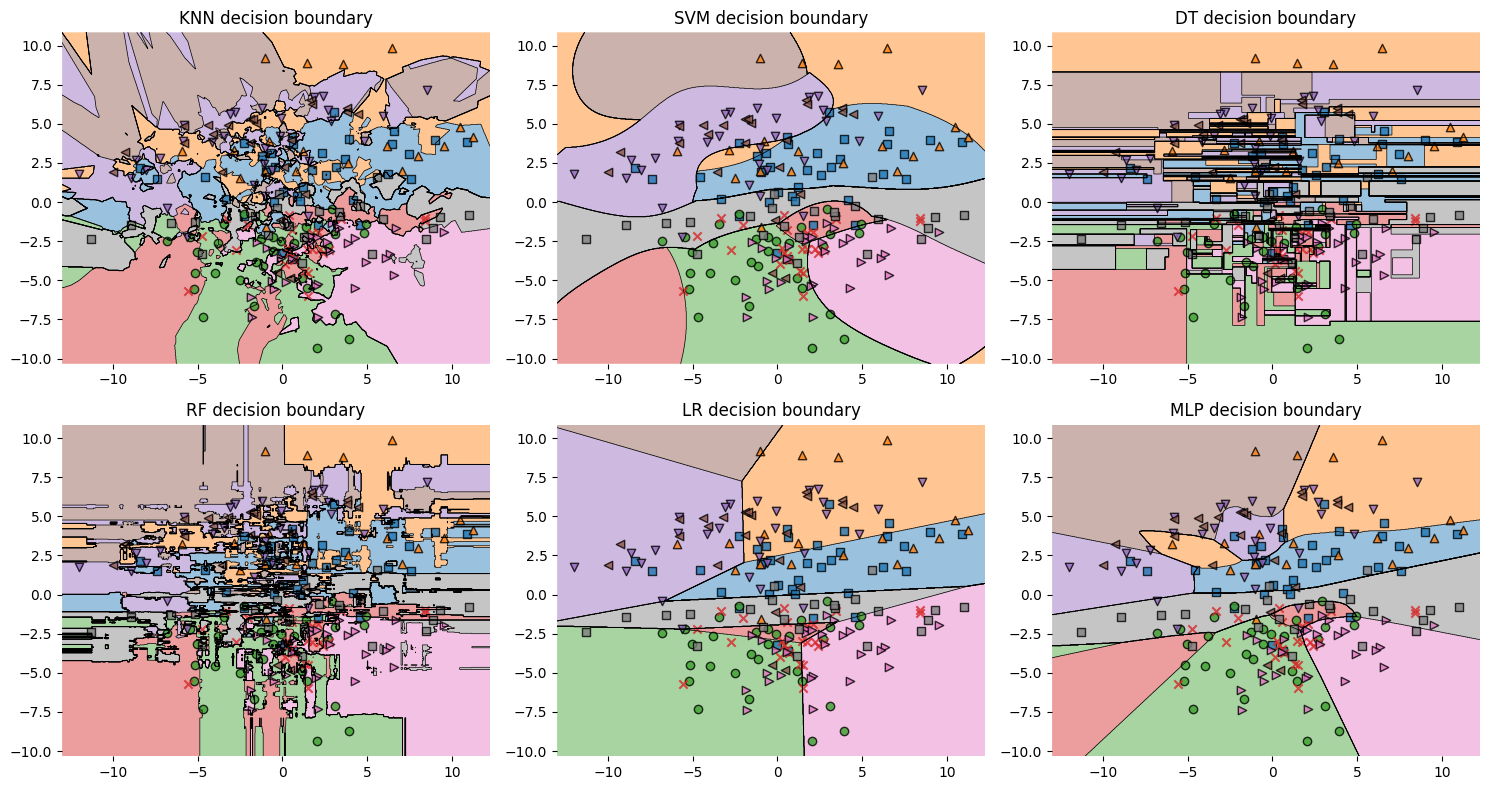

In [45]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_data = PCA(n_components=2).fit_transform(X)
x_train_boundary, x_test_boundary, y_train_boundary, y_test_boundary = train_test_split(pca_data, y, test_size=TEST_SIZE, random_state=SEED, shuffle=True)
class_mapping_2d = {cls: idx for idx, cls in enumerate(sorted(y['class'].unique()))}
y_train_boundary = y_train_boundary.replace(class_mapping_2d)
y_test_boundary = y_test_boundary.replace(class_mapping_2d)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for idx, name in enumerate(best_models.keys()):
    if idx >= len(axes):
        break
    params = best_params_map.get(name, {})
    est2d = build_halving_estimator(name)
    est2d.fit(x_train_boundary,y_train_boundary['class'])
    plot_decision_regions(x_test_boundary, y_test_boundary['class'].to_numpy(), clf=est2d, legend=0, ax=axes[idx])
    axes[idx].set_title(f'{name} decision boundary')

for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
